In [115]:
# Import.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, load_wine
import importlib
rf = importlib.import_module("random-forests")

# Load datasets.
X_iris, y_iris = load_iris(return_X_y=True)  # feature_type="continuous"
X_wine, y_wine = load_wine(return_X_y=True)  # feature_type="continuous"
breast_cancer = np.genfromtxt("breast-cancer.data", delimiter=",", dtype=str)
breast_cancer = breast_cancer[(breast_cancer != "?").all(axis=1), :]
X_breast_cancer = breast_cancer[:, 1:]  # feature_type="categorical"
y_breast_cancer = breast_cancer[:, 0]
titanic = pd.read_csv("titanic.csv").drop(columns=["PassengerId", "Name", "Ticket", "Cabin"]).dropna()
X_titanic = titanic.loc[:, titanic.columns!="Survived"].to_numpy()  # feature_type: complex
y_titanic = titanic["Survived"].to_numpy()
heart_disease = np.genfromtxt("processed.cleveland.data", delimiter=",")
heart_disease = heart_disease[~np.isnan(heart_disease).any(axis=1), :]
X_heart_disease = heart_disease[:, :13]  # feature_type="categorical"
y_heart_disease = heart_disease[:, 13]
y_heart_disease[np.where(y_heart_disease >= 1)] = 1

In [370]:

n_exp = 5  # Number of experiments.
n_trees = 20  # Number of trees.

# Split the dataset into test and remaining data
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_iris, y_iris, stratify=y_iris, test_size=0.25, random_state=10)
# Create the dataset_iris_test dictionary
dataset_iris_test = {"iris (continuous)": (X_test, y_test, "continuous")}
# Create the dataset_iris_rest dictionary
dataset_iris_rest = {"iris (continuous)": (X_train_rest, y_train_rest, "continuous")}
# train_ratio array
train_ratio = np.array([0.05, 0.15, 0.30, 0.45, 0.60, 0.75, 1.00])
# Create dataset_iris_train dictionary
dataset_iris_train = {}
for ratio in train_ratio:
    # Calculate the number of samples based on the ratio
    num_samples = int(len(X_train_rest) * ratio)
    # Select the corresponding portion of the data
    X_train = X_train_rest[:num_samples]
    y_train = y_train_rest[:num_samples]
    # Add the data to dataset_iris_train dictionary
    dataset_iris_train[f"train_ratio_{ratio}"] = (X_train, y_train, "continuous")
    
error_rates_mean = np.ones((len(dataset_iris_train.keys()), len(train_ratio)))
error_rates_std = np.zeros((len(dataset_iris_train.keys()), len(train_ratio)))

# Assuming the code snippet provided is present above this section

for dataset_idx, (train_key, train_data) in enumerate(dataset_iris_train.items()):
    X_train, y_train, feature_type = train_data
    for r, ratio in enumerate(train_ratio):
        n_features = X_train.shape[1]
        n_c = int(np.sqrt(n_features))
        random_forest = rf.RandomForest(
            n_trees, max_depth=100, min_leaf_size=1, n_candidates=n_c, criterion="gini")
        error_rate = np.ones(n_exp)
        for i in range(n_exp):
            random_forest.fit(X_train, y_train, feature_type, m_features=2)
            y_predicted = random_forest.predict(X_test)
            error_rate[i] = rf.random_forests.misclassification_rate(y_predicted, y_test)
        error_rates_mean[dataset_idx, r] = error_rate.mean()
        error_rates_std[dataset_idx, r] = error_rate.std()

# Display the error rates
print("Mean Error Rates:")
print(error_rates_mean)
print("\nStandard Deviations:")
print(error_rates_std)



Mean Error Rates:
[[0.05789474 0.14210526 0.13157895 0.06315789 0.04210526 0.07894737
  0.19473684]
 [0.01578947 0.         0.01578947 0.01578947 0.00526316 0.02105263
  0.        ]
 [0.01578947 0.01052632 0.01052632 0.01052632 0.01578947 0.03157895
  0.02105263]
 [0.01052632 0.01052632 0.01052632 0.00526316 0.00526316 0.01052632
  0.        ]
 [0.         0.         0.         0.00526316 0.         0.00526316
  0.        ]
 [0.00526316 0.         0.00526316 0.         0.         0.00526316
  0.01052632]
 [0.         0.         0.         0.         0.         0.
  0.        ]]

Standard Deviations:
[[0.0257841  0.09502879 0.12784166 0.05418753 0.01289205 0.02353756
  0.08421053]
 [0.02105263 0.         0.02105263 0.01289205 0.01052632 0.01969293
  0.        ]
 [0.02105263 0.01289205 0.01289205 0.01289205 0.01289205 0.01969293
  0.01969293]
 [0.01289205 0.01289205 0.01289205 0.01052632 0.01052632 0.01289205
  0.        ]
 [0.         0.         0.         0.01052632 0.         0.010526

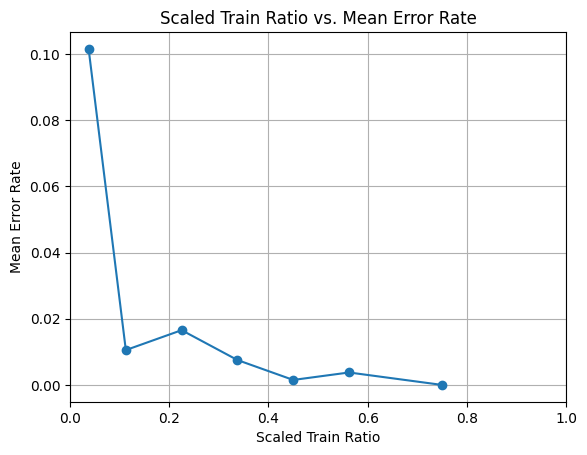

In [371]:
# Assuming error_rates_mean is a 2-dimensional array with shape (n_datasets, n_train_ratios)

# Calculate the average mean error rate across datasets
average_error_rate1 = np.mean(error_rates_mean, axis=1)

# Adjust the train_ratio values
scaled_train_ratio = train_ratio * 3 / 4

# Plotting the graph
plt.plot(scaled_train_ratio, average_error_rate1, marker='o')
plt.xlabel('Scaled Train Ratio')
plt.ylabel('Mean Error Rate')
plt.title('Scaled Train Ratio vs. Mean Error Rate')
plt.xlim(0, 1)
plt.grid(True)
plt.show()



In [372]:
n_exp = 5  # Number of experiments.
n_trees = 20  # Number of trees.

# Split the dataset into test and remaining data
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_wine, y_wine, stratify=y_wine, test_size=0.25, random_state=10)
# Create the dataset_iris_test dictionary
dataset_wine_test = {"wine (continuous)": (X_test, y_test, "continuous")}
# Create the dataset_iris_rest dictionary
dataset_wine_rest = {"wine (continuous)": (X_train_rest, y_train_rest, "continuous")}
# train_ratio array
train_ratio = np.array([0.05, 0.15, 0.30, 0.45, 0.60, 0.75, 1.00])
# Create dataset_iris_train dictionary
dataset_wine_train = {}
for ratio in train_ratio:
    # Calculate the number of samples based on the ratio
    num_samples = int(len(X_train_rest) * ratio)
    # Select the corresponding portion of the data
    X_train = X_train_rest[:num_samples]
    y_train = y_train_rest[:num_samples]
    # Add the data to dataset_iris_train dictionary
    dataset_wine_train[f"train_ratio_{ratio}"] = (X_train, y_train, "continuous")
    
error_rates_mean = np.ones((len(dataset_wine_train.keys()), len(train_ratio)))
error_rates_std = np.zeros((len(dataset_wine_train.keys()), len(train_ratio)))

# Assuming the code snippet provided is present above this section

for dataset_idx, (train_key, train_data) in enumerate(dataset_wine_train.items()):
    X_train, y_train, feature_type = train_data
    for r, ratio in enumerate(train_ratio):
        n_features = X_train.shape[1]
        n_c = int(np.sqrt(n_features))
        random_forest = rf.RandomForest(
            n_trees, max_depth=100, min_leaf_size=1, n_candidates=n_c, criterion="gini")
        error_rate = np.ones(n_exp)
        for i in range(n_exp):
            random_forest.fit(X_train, y_train, feature_type, m_features=2)
            y_predicted = random_forest.predict(X_test)
            error_rate[i] = rf.random_forests.misclassification_rate(y_predicted, y_test)
        error_rates_mean[dataset_idx, r] = error_rate.mean()
        error_rates_std[dataset_idx, r] = error_rate.std()

# Display the error rates
print("Mean Error Rates:")
print(error_rates_mean)
print("\nStandard Deviations:")
print(error_rates_std)

# Assuming error_rates_mean is a 2-dimensional array with shape (n_datasets, n_train_ratios)


Mean Error Rates:
[[0.26666667 0.27555556 0.23555556 0.34222222 0.23555556 0.28888889
  0.24444444]
 [0.11555556 0.09777778 0.07555556 0.09777778 0.08       0.08444444
  0.10222222]
 [0.03555556 0.03555556 0.03111111 0.01777778 0.02222222 0.04
  0.03555556]
 [0.02222222 0.03111111 0.02222222 0.02222222 0.01777778 0.02222222
  0.02666667]
 [0.04       0.04       0.01777778 0.02222222 0.03555556 0.01777778
  0.02222222]
 [0.03555556 0.02666667 0.03555556 0.02222222 0.02666667 0.04444444
  0.02222222]
 [0.02666667 0.02666667 0.03111111 0.02222222 0.02222222 0.03555556
  0.02666667]]

Standard Deviations:
[[0.05443311 0.05551109 0.1238079  0.07646511 0.09280272 0.09838197
  0.11066577]
 [0.03265986 0.04786813 0.05183068 0.05896222 0.04121608 0.04532462
  0.03325918]
 [0.01777778 0.02666667 0.01777778 0.00888889 0.01987616 0.01662959
  0.01088662]
 [0.01405457 0.01088662 0.01987616 0.         0.00888889 0.01405457
  0.01662959]
 [0.02591534 0.02177324 0.01662959 0.01405457 0.02266231 0.0166

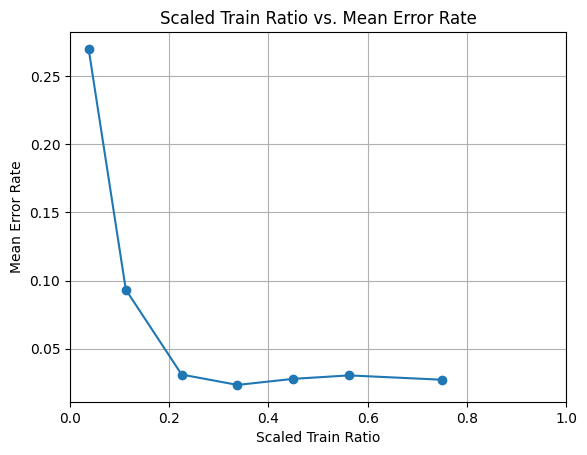

In [373]:
# Calculate the average mean error rate across datasets
average_error_rate2 = np.mean(error_rates_mean, axis=1)

# Adjust the train_ratio values
scaled_train_ratio = train_ratio * 3 / 4

# Plotting the graph
plt.plot(scaled_train_ratio, average_error_rate2, marker='o')
plt.xlabel('Scaled Train Ratio')
plt.ylabel('Mean Error Rate')
plt.title('Scaled Train Ratio vs. Mean Error Rate')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

In [377]:
n_exp = 5  # Number of experiments.
n_trees = 20  # Number of trees.

# Split the dataset into test and remaining data
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_breast_cancer, y_breast_cancer, stratify=y_breast_cancer, test_size=0.25, random_state=10)
# Create the dataset_iris_test dictionary
dataset_breast_test = {"breast (categorical)": (X_test, y_test, "categorical")}
# Create the dataset_iris_rest dictionary
dataset_breast_rest = {"breast (categorical)": (X_train_rest, y_train_rest, "categorical")}
# train_ratio array
train_ratio = np.array([0.05, 0.15, 0.30, 0.45, 0.60, 0.75, 1.00])
# Create dataset_iris_train dictionary
dataset_breast_train = {}
for ratio in train_ratio:
    # Calculate the number of samples based on the ratio
    num_samples = int(len(X_train_rest) * ratio)
    # Select the corresponding portion of the data
    X_train = X_train_rest[:num_samples]
    y_train = y_train_rest[:num_samples]
    # Add the data to dataset_iris_train dictionary
    dataset_breast_train[f"train_ratio_{ratio}"] = (X_train, y_train, "categorical")
    
error_rates_mean = np.ones((len(dataset_breast_train.keys()), len(train_ratio)))
error_rates_std = np.zeros((len(dataset_breast_train.keys()), len(train_ratio)))

# Assuming the code snippet provided is present above this section

for dataset_idx, (train_key, train_data) in enumerate(dataset_breast_train.items()):
    X_train, y_train, feature_type = train_data
    for r, ratio in enumerate(train_ratio):
        n_features = X_train.shape[1]
        n_c = int(np.sqrt(n_features))
        random_forest = rf.RandomForest(
            n_trees, max_depth=100, min_leaf_size=1, n_candidates=n_c, criterion="gini")
        error_rate = np.ones(n_exp)
        for i in range(n_exp):
            random_forest.fit(X_train, y_train, feature_type, m_features=2)
            y_predicted = random_forest.predict(X_test)
            error_rate[i] = rf.random_forests.misclassification_rate(y_predicted, y_test)
        error_rates_mean[dataset_idx, r] = error_rate.mean()
        error_rates_std[dataset_idx, r] = error_rate.std()

# Display the error rates
print("Mean Error Rates:")
print(error_rates_mean)
print("\nStandard Deviations:")
print(error_rates_std)

# Assuming error_rates_mean is a 2-dimensional array with shape (n_datasets, n_train_ratios)


Mean Error Rates:
[[0.52571429 0.47428571 0.50285714 0.51142857 0.51428571 0.51714286
  0.47714286]
 [0.46857143 0.48       0.46285714 0.45714286 0.44       0.47428571
  0.46285714]
 [0.28       0.28       0.3        0.27714286 0.32285714 0.3
  0.28      ]
 [0.24571429 0.23714286 0.24571429 0.20285714 0.22571429 0.22285714
  0.21428571]
 [0.20857143 0.23714286 0.22285714 0.21428571 0.22285714 0.21714286
  0.23428571]
 [0.23428571 0.24285714 0.24857143 0.22       0.22857143 0.22571429
  0.24285714]
 [0.23428571 0.25142857 0.19428571 0.23428571 0.25428571 0.22857143
  0.25428571]]

Standard Deviations:
[[0.09705879 0.08       0.05451081 0.04729413 0.05569597 0.05671267
  0.01714286]
 [0.0318158  0.02649605 0.04295228 0.08759834 0.0376883  0.03307382
  0.04      ]
 [0.04       0.04659859 0.0451754  0.03681171 0.03452299 0.05030519
  0.02321154]
 [0.01665986 0.02321154 0.0318158  0.01665986 0.01069045 0.01456863
  0.02555506]
 [0.02321154 0.01456863 0.01937809 0.039383   0.02799417 0.01399

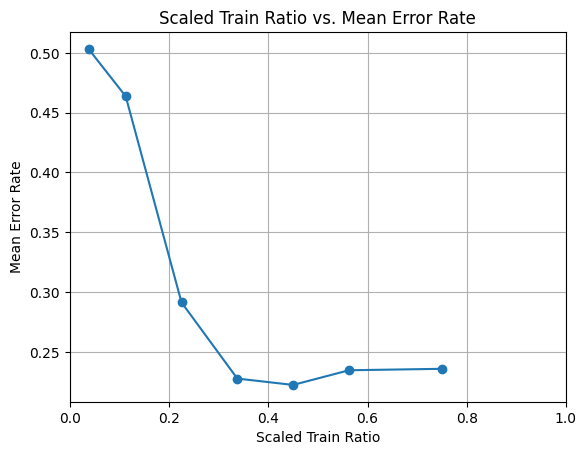

In [378]:
# Calculate the average mean error rate across datasets
average_error_rate3 = np.mean(error_rates_mean, axis=1)

# Adjust the train_ratio values
scaled_train_ratio = train_ratio * 3 / 4

# Plotting the graph
plt.plot(scaled_train_ratio, average_error_rate3, marker='o')
plt.xlabel('Scaled Train Ratio')
plt.ylabel('Mean Error Rate')
plt.title('Scaled Train Ratio vs. Mean Error Rate')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

In [380]:


n_exp = 5  # Number of experiments.
n_trees = 20  # Number of trees.

feature_type_titanic = np.ones(7)
feature_type_titanic[2] = 0  # Age
feature_type_titanic[5] = 0  # Fare

# Split the dataset into test and remaining data
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_titanic, y_titanic, stratify=y_titanic, test_size=0.25, random_state=10)

# Append the feature_type_titanic to X_train_rest and X_test
X_train_rest = np.concatenate((X_train_rest, feature_type_titanic.reshape(1, -1).repeat(X_train_rest.shape[0], axis=0)), axis=1)
X_test = np.concatenate((X_test, feature_type_titanic.reshape(1, -1).repeat(X_test.shape[0], axis=0)), axis=1)

# Create the dataset_titanic_test dictionary
dataset_titanic_test = {"titanic (complex)": (X_test, y_test, feature_type_titanic)}
# Create the dataset_titanic_rest dictionary
dataset_titanic_rest = {"titanic (complex)": (X_train_rest, y_train_rest, feature_type_titanic)}

# train_ratio array
train_ratio = np.array([0.05, 0.15, 0.30, 0.45, 0.60, 0.75, 1.00])
# Create dataset_titanic_train dictionary
dataset_titanic_train = {}

for ratio in train_ratio:
    # Calculate the number of samples based on the ratio
    num_samples = int(len(X_train_rest) * ratio)
    # Select the corresponding portion of the data
    X_train = X_train_rest[:num_samples]
    y_train = y_train_rest[:num_samples]
    # Add the data to dataset_titanic_train dictionary
    dataset_titanic_train[f"train_ratio_{ratio}"] = (X_train, y_train, feature_type_titanic)

error_rates_mean = np.ones((len(dataset_titanic_train.keys()), len(train_ratio)))
error_rates_std = np.zeros((len(dataset_titanic_train.keys()), len(train_ratio)))

for dataset_idx, (train_key, train_data) in enumerate(dataset_titanic_train.items()):
    X_train, y_train, feature_type = train_data
    for r, ratio in enumerate(train_ratio):
        n_features = X_train.shape[1]
        n_c = int(np.sqrt(n_features))
        random_forest = rf.RandomForest(
            n_trees, max_depth=100, min_leaf_size=1, n_candidates=n_c, criterion="gini")
        error_rate = np.ones(n_exp)
        for i in range(n_exp):
            random_forest.fit(X_train, y_train, feature_type, m_features=2)
            y_predicted = random_forest.predict(X_test)
            error_rate[i] = rf.random_forests.misclassification_rate(y_predicted, y_test)
        error_rates_mean[dataset_idx, r] = error_rate.mean()
        error_rates_std[dataset_idx, r] = error_rate.std()

# Display the error rates
print("Mean Error Rates:")
print(error_rates_mean)
print("\nStandard Deviations:")
print(error_rates_std)

# Assuming error_rates_mean is a 2-dimensional array


Mean Error Rates:
[[0.33258427 0.29662921 0.34494382 0.33707865 0.28426966 0.32134831
  0.32022472]
 [0.24269663 0.22808989 0.23258427 0.23707865 0.22247191 0.23595506
  0.23707865]
 [0.26853933 0.24719101 0.25730337 0.25280899 0.25280899 0.26292135
  0.25730337]
 [0.23820225 0.24157303 0.23820225 0.23033708 0.23820225 0.24269663
  0.22247191]
 [0.20337079 0.23146067 0.22022472 0.22359551 0.21460674 0.21348315
  0.22134831]
 [0.20337079 0.22359551 0.20449438 0.20898876 0.2011236  0.21011236
  0.22022472]
 [0.21573034 0.21797753 0.21797753 0.22808989 0.21235955 0.21797753
  0.2247191 ]]

Standard Deviations:
[[0.04705706 0.03930979 0.02346136 0.02537436 0.05994148 0.02691943
  0.03408034]
 [0.01790717 0.01100894 0.04403577 0.01991016 0.01832529 0.01376118
  0.01825627]
 [0.01681644 0.01507462 0.01790717 0.01178437 0.00355312 0.02340749
  0.01348315]
 [0.01866657 0.01913414 0.01651341 0.01464989 0.01261233 0.01482124
  0.0076206 ]
 [0.01251183 0.01825627 0.01251183 0.01991016 0.01643679 

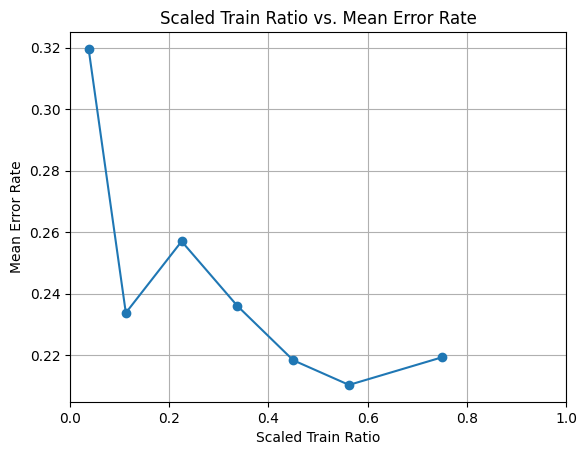

In [381]:
# Calculate the average mean error rate across datasets
average_error_rate4 = np.mean(error_rates_mean, axis=1)

# Adjust the train_ratio values
scaled_train_ratio = train_ratio * 3 / 4

# Plotting the graph
plt.plot(scaled_train_ratio, average_error_rate4, marker='o')
plt.xlabel('Scaled Train Ratio')
plt.ylabel('Mean Error Rate')
plt.title('Scaled Train Ratio vs. Mean Error Rate')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

In [382]:


n_exp = 5  # Number of experiments.
n_trees = 20  # Number of trees.

ftype_h_d = np.array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

# Split the dataset into test and remaining data
X_train_rest, X_test, y_train_rest, y_test = train_test_split(X_heart_disease, y_heart_disease, stratify=y_heart_disease, test_size=0.25, random_state=10)

# Append the feature_type_titanic to X_train_rest and X_test
X_train_rest = np.concatenate((X_train_rest, ftype_h_d.reshape(1, -1).repeat(X_train_rest.shape[0], axis=0)), axis=1)
X_test = np.concatenate((X_test, ftype_h_d.reshape(1, -1).repeat(X_test.shape[0], axis=0)), axis=1)

# Create the dataset_titanic_test dictionary
dataset_heart_test = {"heart (complex)": (X_test, y_test, ftype_h_d)}
# Create the dataset_titanic_rest dictionary
dataset_heart_rest = {"heart (complex)": (X_train_rest, y_train_rest, ftype_h_d)}

# train_ratio array
train_ratio = np.array([0.05, 0.15, 0.30, 0.45, 0.60, 0.75, 1.00])
# Create dataset_titanic_train dictionary
dataset_heart_train = {}

for ratio in train_ratio:
    # Calculate the number of samples based on the ratio
    num_samples = int(len(X_train_rest) * ratio)
    # Select the corresponding portion of the data
    X_train = X_train_rest[:num_samples]
    y_train = y_train_rest[:num_samples]
    # Add the data to dataset_titanic_train dictionary
    dataset_heart_train[f"train_ratio_{ratio}"] = (X_train, y_train, ftype_h_d)

error_rates_mean = np.ones((len(dataset_heart_train.keys()), len(train_ratio)))
error_rates_std = np.zeros((len(dataset_heart_train.keys()), len(train_ratio)))

for dataset_idx, (train_key, train_data) in enumerate(dataset_heart_train.items()):
    X_train, y_train, feature_type = train_data
    for r, ratio in enumerate(train_ratio):
        n_features = X_train.shape[1]
        n_c = int(np.sqrt(n_features))
        random_forest = rf.RandomForest(
            n_trees, max_depth=100, min_leaf_size=1, n_candidates=n_c, criterion="gini")
        error_rate = np.ones(n_exp)
        for i in range(n_exp):
            random_forest.fit(X_train, y_train, feature_type, m_features=2)
            y_predicted = random_forest.predict(X_test)
            error_rate[i] = rf.random_forests.misclassification_rate(y_predicted, y_test)
        error_rates_mean[dataset_idx, r] = error_rate.mean()
        error_rates_std[dataset_idx, r] = error_rate.std()

# Display the error rates
print("Mean Error Rates:")
print(error_rates_mean)
print("\nStandard Deviations:")
print(error_rates_std)

Mean Error Rates:
[[0.53866667 0.53333333 0.53333333 0.53333333 0.53333333 0.54133333
  0.53333333]
 [0.29333333 0.384      0.32266667 0.336      0.29866667 0.32
  0.34666667]
 [0.25866667 0.272      0.25066667 0.232      0.26666667 0.24266667
  0.304     ]
 [0.22133333 0.2        0.19466667 0.2        0.23733333 0.19466667
  0.20266667]
 [0.15733333 0.152      0.16       0.168      0.17066667 0.176
  0.176     ]
 [0.14666667 0.14933333 0.168      0.17066667 0.17066667 0.16266667
  0.13866667]
 [0.17866667 0.184      0.184      0.17333333 0.15733333 0.17333333
  0.168     ]]

Standard Deviations:
[[0.01066667 0.         0.         0.         0.         0.01066667
  0.        ]
 [0.0519829  0.05555378 0.06219682 0.03415    0.01995551 0.02529822
  0.05842374]
 [0.01995551 0.01995551 0.02847221 0.01359739 0.02796824 0.01959592
  0.02585429]
 [0.01808621 0.01686548 0.03733333 0.00843274 0.03309246 0.01359739
  0.03617243]
 [0.02585429 0.01808621 0.02231093 0.05373184 0.02847221 0.02133333


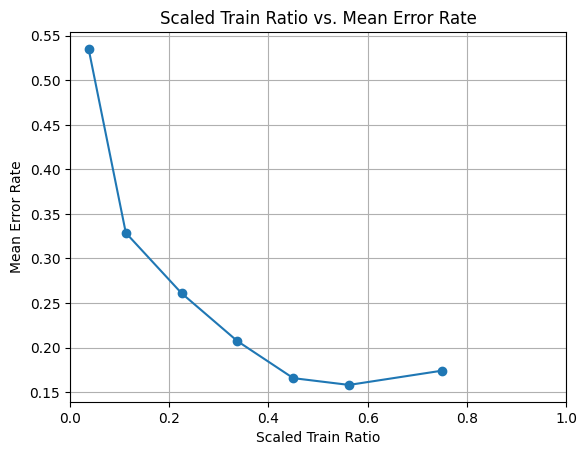

In [383]:
# Calculate the average mean error rate across datasets
average_error_rate5 = np.mean(error_rates_mean, axis=1)

# Adjust the train_ratio values
scaled_train_ratio = train_ratio * 3 / 4

# Plotting the graph
plt.plot(scaled_train_ratio, average_error_rate5, marker='o')
plt.xlabel('Scaled Train Ratio')
plt.ylabel('Mean Error Rate')
plt.title('Scaled Train Ratio vs. Mean Error Rate')
plt.xlim(0, 1)
plt.grid(True)
plt.show()

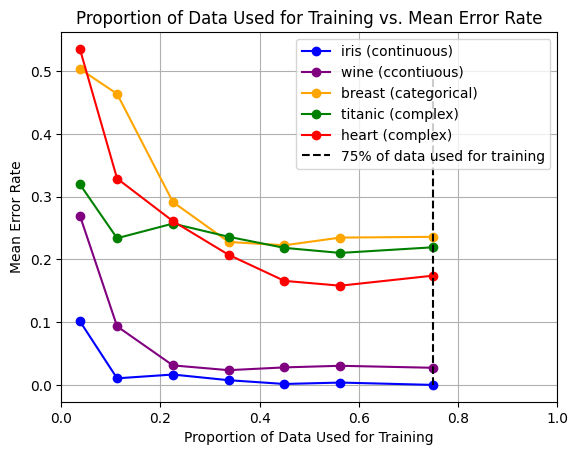

In [393]:
data_means = np.array([average_error_rate1, average_error_rate2, average_error_rate3, average_error_rate4, average_error_rate5])
data_names = ["iris (continuous)", "wine (ccontiuous)", "breast (categorical)", "titanic (complex)", "heart (complex)"]
data_colous = ["blue", "purple", "orange", "green", "red"]
for i in range(len(data_means)):
    plt.plot(scaled_train_ratio, data_means[i], marker='o', label= data_names[i], color=data_colous[i])

scaled_train_ratio = train_ratio * 3 / 4

# Plotting the graph
plt.xlabel('Proportion of Data Used for Training')
plt.ylabel('Mean Error Rate')
plt.title('Proportion of Data Used for Training vs. Mean Error Rate')
plt.xlim(0, 1)
plt.grid(True)
plt.vlines(0.75, 0, 0.5, colors='k', linestyles='dashed', label='75% of data used for training')
plt.legend()
plt.show()